<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descriptive Statistics</a></span><ul class="toc-item"><li><span><a href="#Calculating-and-Visualization-of-Descriptive-Statistics" data-toc-modified-id="Calculating-and-Visualization-of-Descriptive-Statistics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculating and Visualization of Descriptive Statistics</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Remove Outliers</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline

In [2]:
import os
from functools import reduce
from operator import mul
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from tqdm import tqdm

In [3]:
data = pd.read_csv(os.path.join('data', '1', 'data.tsv'), delimiter='\t')
data.head(5)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


Description: These data were collected from the 25 top liberal arts colleges and the 25 top research universities. There are 50 cases on 8 variables.
Variable Names:
* **School**: Contains the name of each school
* **School_Type**: Coded 'LibArts' for liberal arts and 'Univ' for university
* **SAT**: Median combined Math and Verbal SAT score of students
* **Acceptance**: % of applicants accepted
* **$/Student**: Money spent per student in dollars
* **Top 10%**: % of students in the top 10% of their h.s. graduating class
* **%PhD**: % of faculty at the institution that have PhD degrees
* **Grad%**: % of students at institution who eventually graduate

# Descriptive Statistics

## Calculating and Visualization of Descriptive Statistics

In [4]:
def plot_column(data, name, ):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(15, 5)
    
    plt_data_1 = data[data['School_Type']=='Lib Arts'][name]
    plt_data_2 = data[data['School_Type']=='Univ'][name]
    ax1.plot(plt_data_1.index, plt_data_1, 'ro')
    ax1.plot(plt_data_2.index, plt_data_2, 'bo')
    ax1.set_title('{} data'.format(name))
    ax2.boxplot(data[name])
    
    data[name].hist()
    ax3.set_title('{} hist'.format(name))
    
def describe_column(data, name):
    plot_column(data, name)
    data = data[name]
    description = pd.DataFrame(data.describe()).transpose().set_index([pd.Index([name])])
    mode = data.mode()    
    description['mode'] = mode[0] if len(mode) == 1 else 'not one mode'
    description['range'] = description['max'] - description['min']
    return description

,count,mean,std,min,25%,50%,75%,max,mode,range
SAT,50.0,1263.96,62.329591,1109.0,1225.0,1264.0,1304.5,1400.0,1300,291.0


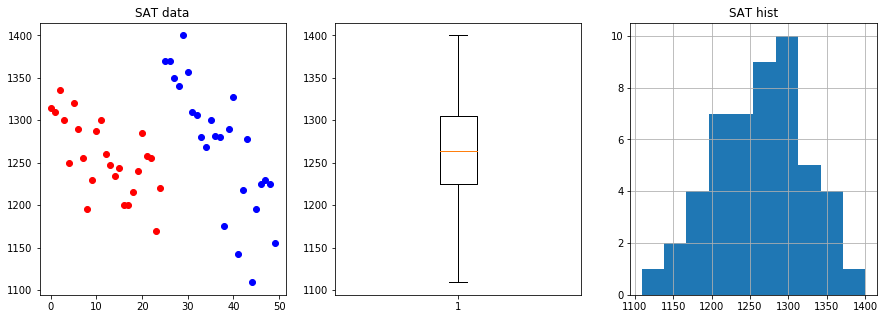

In [5]:
describe_column(data, 'SAT')

**Распределение слегка асимметрично, однако унимодально и медиана близка к среднему значению. Выбросов не наблюдается. И медиана, и среднее могут быть использованы в качестве меры центральной тенденции. Стандартное отклонение не велико (по сравнению с размахом), как и межквартильное расстояние, что говорит о невысокой изменчивости данных.**

,count,mean,std,min,25%,50%,75%,max,mode,range
Acceptance,50.0,37.84,13.363612,17.0,25.75,36.0,47.75,67.0,24,50.0


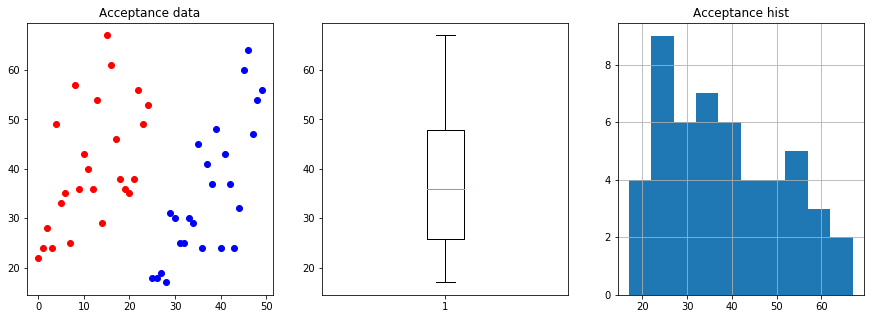

In [6]:
describe_column(data, 'Acceptance')

**Распределение асимметрично и унимодально. Медиана близка к среднему. Выбросов не наблюдается. И медиана, и среднее могут быть использованы в качестве меры центральной тенденции. Наблюдается высокая изменчивость данных, о чём свидетельствует высокие стандартное отклонение и межквартильное расстояние.**

,count,mean,std,min,25%,50%,75%,max,mode,range
$/Student,50.0,30247.2,15266.172682,17520.0,20182.25,24994.5,36803.75,102262.0,not one mode,84742.0


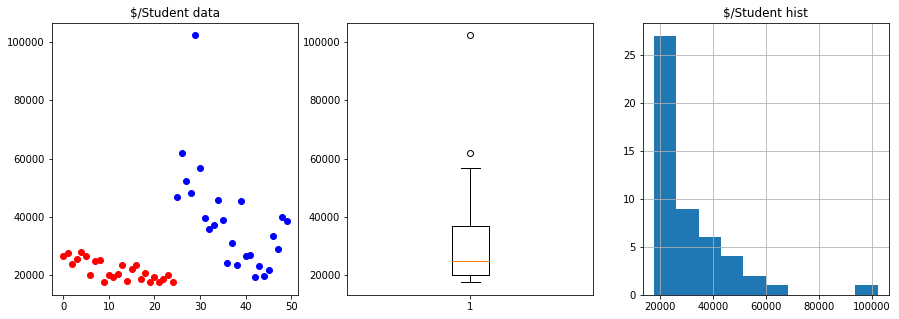

In [7]:
describe_column(data, '$/Student')

**Распределение сильно асимметрично и не унимодально. Медиана отличается от среднего и наблюдаются выбросы. В качестве меры центральной тенденции имеет смысл использовать медиану. Изменчивость данных невысокая.**

,count,mean,std,min,25%,50%,75%,max,mode,range
Top 10%,50.0,74.44,13.515162,47.0,65.0,76.5,85.0,98.0,not one mode,51.0


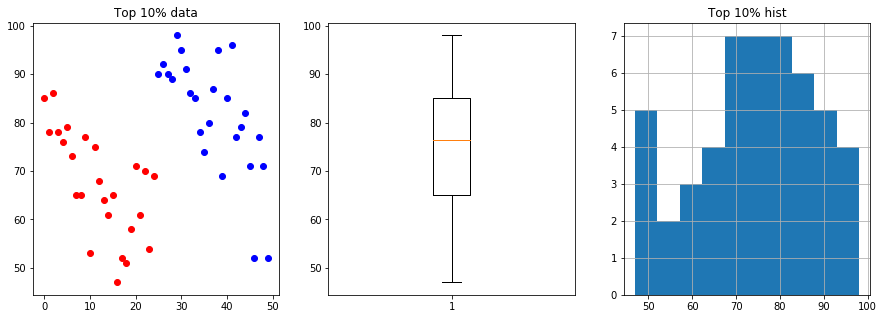

In [8]:
describe_column(data, 'Top 10%')

**Распределение асимметрично и не унимодально. Медиана близка к среднему. Выбросов не наблюдается. И медиана, и среднее могут быть использованы в качестве меры центральной тенденции. Наблюдается высокая изменчивость данных, о чём свидетельствует высокие стандартное отклонение и межквартильное расстояние.**

,count,mean,std,min,25%,50%,75%,max,mode,range
%PhD,50.0,90.56,8.258972,58.0,86.25,93.0,97.75,100.0,98,42.0


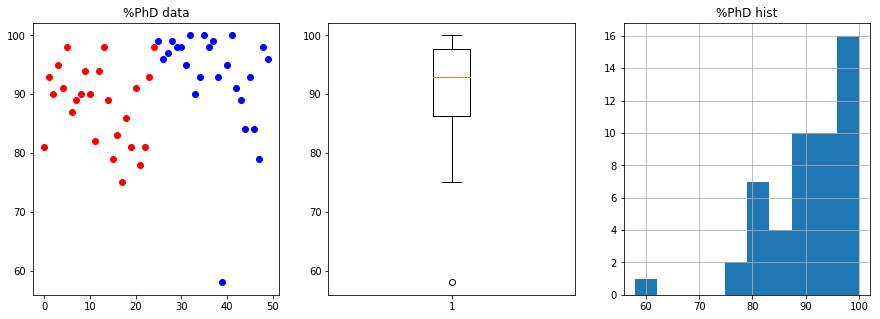

In [9]:
describe_column(data, '%PhD')

**Распределение сильно асимметрично, однако унимодально. Медиана близка к среднему. Наблюдается выброс. В качестве меры центральной тенденции имеет смысл использовать медиану. Изменчивость данных невысокая.**

,count,mean,std,min,25%,50%,75%,max,mode,range
Grad%,50.0,83.48,7.557237,61.0,77.25,85.5,89.0,95.0,88,34.0


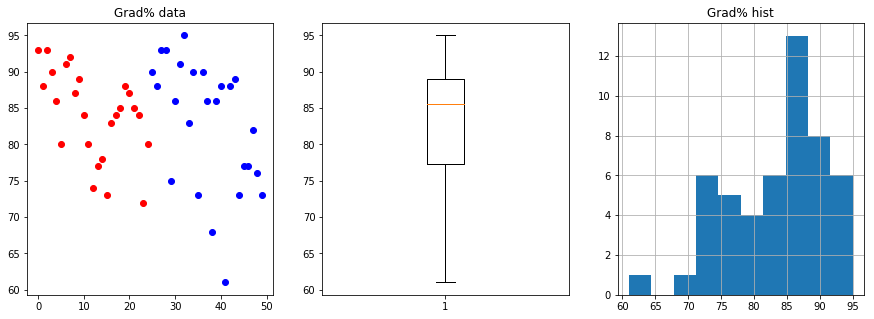

In [10]:
describe_column(data, 'Grad%')

**Распределение асимметрично, однако унимодально. Медиана близка к среднему. Выбросов ненаблюдается. В качестве меры центральной тенденции можно использовать как медиану, так и среднее. Изменчивость данных высокая.**

## Remove Outliers 

In [11]:
num_data = data.select_dtypes(include=["number"])
other_data = data.select_dtypes(exclude=["number"])
idx = np.all(np.abs(stats.zscore(num_data)) < 3, axis=1)
data_cleaned = pd.concat([num_data.loc[idx], other_data.loc[idx]], axis=1)

,count,mean,std,min,25%,50%,75%,max,mode,range
%PhD,47.0,90.893617,6.808671,75.0,86.5,93.0,96.5,100.0,98,25.0


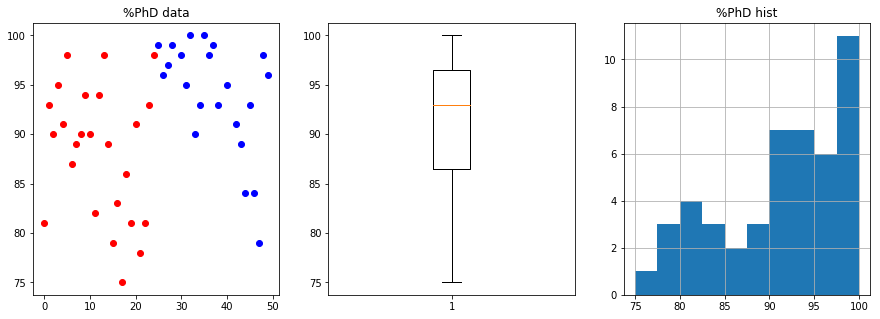

In [12]:
describe_column(data_cleaned, '%PhD')

**Переход к нормированным значениям позволил отсечь выбросы в тех наборах данных, где они были**

## Correlation

In [13]:
def plot_correlation(data, name_1, name_2):
    plt_data_1 = data[data['School_Type']=='Lib Arts']
    plt_data_2 = data[data['School_Type']=='Univ']

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(15, 5)
    ax1.plot(plt_data_1[name_1], plt_data_1[name_2], 'ro')
    ax2.plot(plt_data_2[name_1], plt_data_2[name_2], 'bo')
    ax1.set_title('Lib Arts')
    ax2.set_title('Univ')
    ax1.set_ylabel(name_1)
    ax1.set_xlabel(name_2)
    ax2.set_xlabel(name_2)
    
    ax3.plot(data[name_1], data[name_2], 'ko')
    ax3.set_title('Both')
    ax3.set_xlabel(name_2)

    lib_arts_r = pearsonr(plt_data_1[name_1], plt_data_1[name_2])
    univ_r = pearsonr(plt_data_2[name_1], plt_data_2[name_2])
    both_r = pearsonr(data[name_1], data[name_2])
    index = pd.Index(['Lib Arts', 'Univ', 'Both'])
    return pd.DataFrame([lib_arts_r,univ_r, both_r], columns=['R', 'p-value']).set_index([index]).transpose()

,Lib Arts,Univ,Both
R,0.423645,0.651683,0.569126
p-value,0.034831,0.000417,0.000016


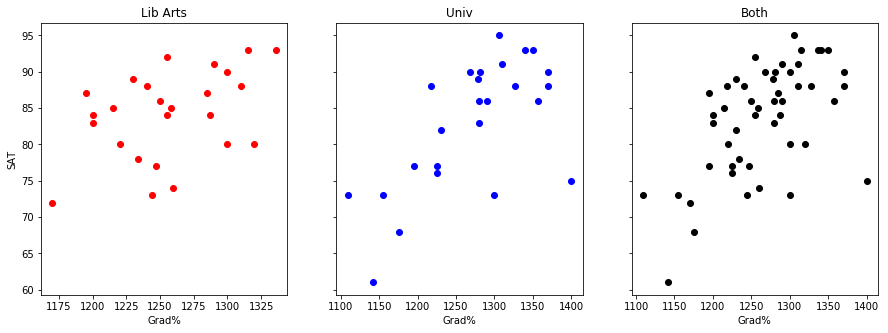

In [14]:
plot_correlation(data, 'SAT', 'Grad%')

**Вполне ожидаемо, что средний бал по математике больше связан с процентом выпускников исследовательского университета, чем с процентом выпускников гуманитарных колледжей.**

,Lib Arts,Univ,Both
R,0.133816,0.224475,0.220944
p-value,0.523666,0.280697,0.123093


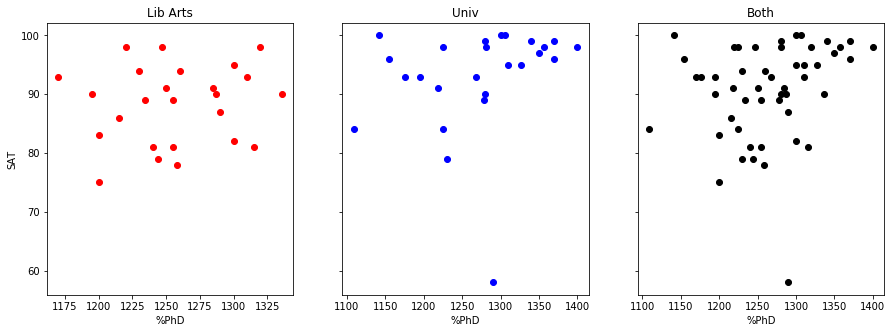

In [15]:
plot_correlation(data, 'SAT', '%PhD')

**Однако процент процент защитивших PhD слабо связан со средним балом по математике**

,Lib Arts,Univ,Both
R,-0.175029,-0.262920,-0.288819
p-value,0.402690,0.204162,0.041933


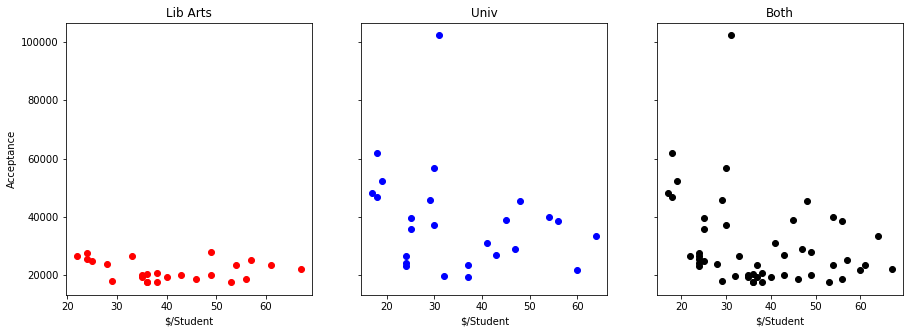

In [16]:
plot_correlation(data, 'Acceptance', '$/Student')

**Здесь зависимость нелинейная, поэтому о коэффициенте корреляции Пирсона говорить не имеет смысла. Однако можно заметить, что с увеличением числа студентов уменьшается число денег, потраченных на каждого студента.**

,Lib Arts,Univ,Both
R,0.315962,0.401354,0.448616
p-value,0.123889,0.046752,0.001085


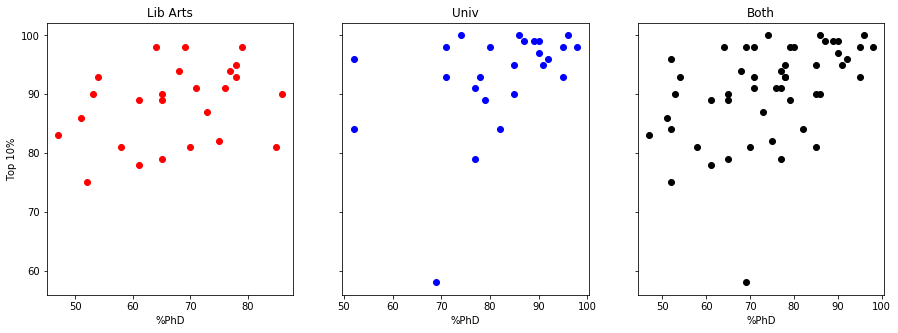

In [17]:
plot_correlation(data, 'Top 10%', '%PhD')

**Процент студентов с высокими балами имеет связь с процентом успешных защит PhD**.